In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
import rasterio
import numpy as np

with rasterio.open("viirs.tif") as src:
    data = src.read(1)
    nodata = src.nodata  

if nodata is not None:
    missing_pixels = np.sum(data == nodata)
else:
    missing_pixels = np.sum(np.isnan(data))

total_pixels = data.size
print(f"Total pixels: {total_pixels}")
print(f"Missing pixels: {missing_pixels}")
print(f"Percentage missing: {missing_pixels / total_pixels * 100:.2f}%")

In [2]:
import xarray as xr

In [3]:
viirs = xr.open_dataset(r"C:\Users\Ankit\OneDrive\Desktop\Datasets_Forest_fire\updated_viirs_binary_fire_2015_2016.nc")

In [4]:
viirs.data_vars

Data variables:
    fire_label  (time, latitude, longitude) uint8 4MB ...

In [9]:
import rasterio
lulc_path = r"C:\Users\Ankit\OneDrive\Desktop\Datasets_Forest_fire\lulc_maps_tif\LULC_2015_clipped.tif"

In [20]:
viirs_array = viirs['fire_label'].sel(time=testtime).values

if viirs_array.ndim == 3:
    viirs_array = viirs_array[0, :, :]  

print("VIIRS shape after fix:", viirs_array.shape)

VIIRS shape after fix: (13, 17)


VIIRS shape after fix: (13, 17)


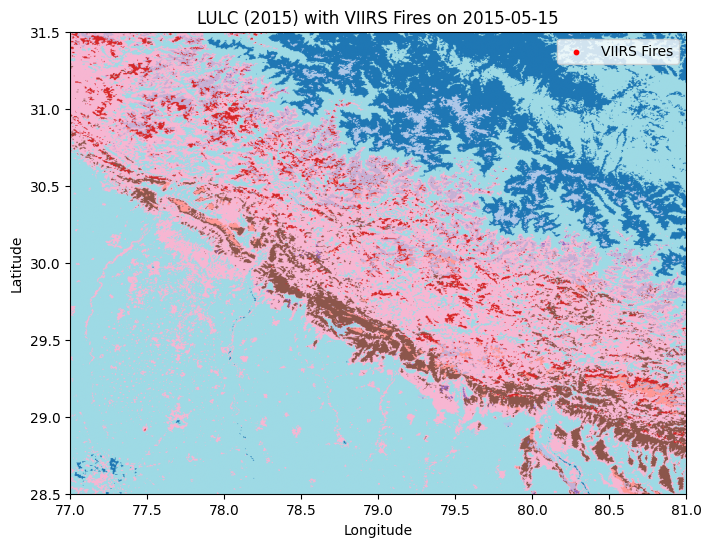

In [24]:
import numpy as np

test_time = pd.Timestamp("2016-12-30 08:00:00")

with rasterio.open(lulc_path) as lulc_src:
    lulc = lulc_src.read(1)
    lulc_meta = lulc_src.meta
    lulc_transform = lulc_src.transform

viirs_array = viirs['fire_label'].sel(time=testtime).values

if viirs_array.ndim == 3:
    viirs_array = viirs_array[0, :, :] 

print("VIIRS shape after fix:", viirs_array.shape)
lats = viirs['latitude'].values
lons = viirs['longitude'].values

fire_y, fire_x = np.where(viirs_array == 1)

fire_lats = lats[fire_y]
fire_lons = lons[fire_x]

fig, ax = plt.subplots(figsize=(8, 6))

lulc_img = ax.imshow(lulc, cmap='tab20', extent=(
    lulc_transform[2],
    lulc_transform[2] + lulc.shape[1] * lulc_transform[0],
    lulc_transform[5] + lulc.shape[0] * lulc_transform[4],
    lulc_transform[5]
))

ax.scatter(fire_lons, fire_lats, color='red', s=10, label='VIIRS Fires')

ax.set_title(f"LULC (2015) with VIIRS Fires on {testtime}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.show()